This is a Project is **Predicting prices of houses** in different parts of London based on a dataset.

Step: **Importing Libraries** required

In [1]:
import pandas as pd #importing the pandas library
import numpy as np #importing the numpy library
import seaborn as sns #importing the seaborn library
import matplotlib.pyplot as plt #importing the matplotlib library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #ignoring the warning messages

In [2]:
df_house= pd.read_csv('C:/Users/Jojorosh/housing_in_london_monthly_variables.csv') #loading the dataset from the local system

In [3]:
df_house #displaying the dataset

date            area  average_price       code  houses_sold  \
0      01/01/1995  city of london          91449  E09000001         17.0   
1      01/02/1995  city of london          82203  E09000001          7.0   
2      01/03/1995  city of london          79121  E09000001         14.0   
3      01/04/1995  city of london          77101  E09000001          7.0   
4      01/05/1995  city of london          84409  E09000001         10.0   
...           ...             ...            ...        ...          ...   
13544  01/09/2019         england         249942  E92000001      64605.0   
13545  01/10/2019         england         249376  E92000001      68677.0   
13546  01/11/2019         england         248515  E92000001      67814.0   
13547  01/12/2019         england         250410  E92000001          NaN   
13548  01/01/2020         england         247355  E92000001          NaN   

       no_of_crimes  borough_flag  
0               NaN             1  
1               NaN             1  
2               NaN             1  
3               NaN             1  
4               NaN             1  
...             ...           ...  
13544           NaN             0  
13545           NaN             0  
13546           NaN             0  
13547           NaN             0  
13548           NaN             0  

[13549 rows x 7 columns]

In [4]:
df_house.shape # displaying shape of the dataset

(13549, 7)

In [5]:
df_house.info() # displaying the dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [6]:
df_house.describe() #describing the dataset

average_price    houses_sold  no_of_crimes  borough_flag
count   1.354900e+04   13455.000000   7439.000000  13549.000000
mean    2.635197e+05    3893.994129   2158.352063      0.733338
std     1.876175e+05   12114.402476    902.087742      0.442230
min     4.072200e+04       2.000000      0.000000      0.000000
25%     1.323800e+05     247.000000   1623.000000      0.000000
50%     2.229190e+05     371.000000   2132.000000      1.000000
75%     3.368430e+05    3146.000000   2582.000000      1.000000
max     1.463378e+06  132163.000000   7461.000000      1.000000

**DATA PREPROCESSING**
from the below steps, We are doing data preprocessing by cleaning the data
In the below code, we are representing the missing values with the help of a heatmap.

<AxesSubplot:>

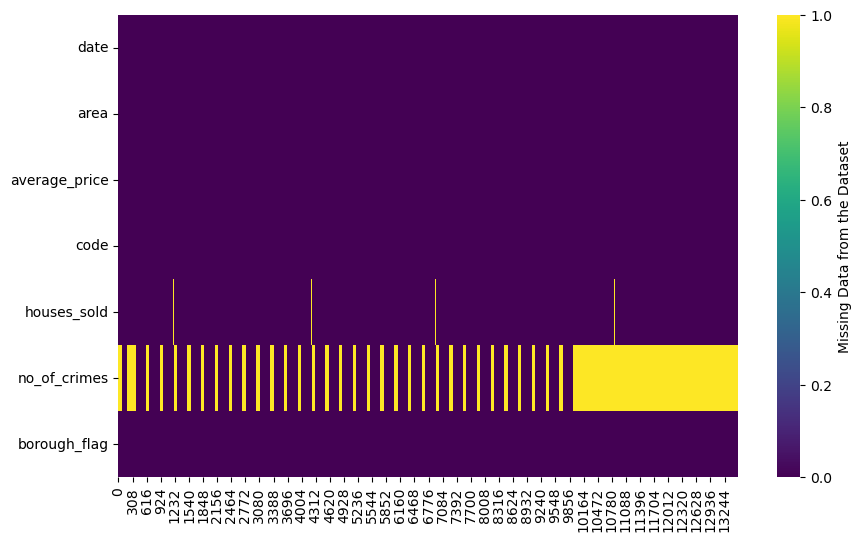

In [7]:
#plotting the missing values from the dataset in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_house.isna().transpose(), cmap="viridis", cbar_kws={'label': 'Missing Data from the Dataset'})

In [8]:
# checking NULL value percentage for each columns
df_null = round(100 *(df_house.isna().sum()/df_house.shape[0]).sort_values(ascending = False) ,2)
df_null.to_frame(name = 'percent NULL data (%)')

percent NULL data (%)
no_of_crimes                   45.10
houses_sold                     0.69
date                            0.00
area                            0.00
average_price                   0.00
code                            0.00
borough_flag                    0.00

In [9]:
#finding the number of null values
df_house.isnull().sum() 

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
borough_flag        0
dtype: int64

In [10]:
#dropping the missing values from the dataset
df_house=df_house.dropna(subset=['houses_sold']) 
#finding the mean and adding to the missing crime fields
london_crime = df_house["no_of_crimes"].mean() 
df_house= df_house.fillna({"no_of_crimes" : london_crime})
df_house.head()

date            area  average_price       code  houses_sold  \
0  01/01/1995  city of london          91449  E09000001         17.0   
1  01/02/1995  city of london          82203  E09000001          7.0   
2  01/03/1995  city of london          79121  E09000001         14.0   
3  01/04/1995  city of london          77101  E09000001          7.0   
4  01/05/1995  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0   2156.729627             1  
1   2156.729627             1  
2   2156.729627             1  
3   2156.729627             1  
4   2156.729627             1

In [11]:
#finding the no of null values again
df_house.isnull().sum()

date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

In [12]:
df_house.head()

date            area  average_price       code  houses_sold  \
0  01/01/1995  city of london          91449  E09000001         17.0   
1  01/02/1995  city of london          82203  E09000001          7.0   
2  01/03/1995  city of london          79121  E09000001         14.0   
3  01/04/1995  city of london          77101  E09000001          7.0   
4  01/05/1995  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0   2156.729627             1  
1   2156.729627             1  
2   2156.729627             1  
3   2156.729627             1  
4   2156.729627             1

In [13]:
df_house['date'] = pd.to_datetime(df_house['date'], format='%d/%m/%Y')
time = df_house['date'].dt.year
#instead of data, the year is being selected for better training .

In [14]:
time #displaying the year

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
13542    2019
13543    2019
13544    2019
13545    2019
13546    2019
Name: date, Length: 13455, dtype: int64

In [15]:
df_house['date']=time

In the above codes, We are **extracting the year from the entire date and assigning it to date**. in the above codes , we can see and understand them . The years like 1995 is written instead of the whole date 01/01/1995.

In [16]:
df_house["area"].unique() #displaying the areas

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'south east',
       'hammersmith and fulham', 'haringey', 'harrow', 'havering',
       'hillingdon', 'hounslow', 'islington', 'kensington and chelsea',
       'kingston upon thames', 'lambeth', 'lewisham', 'merton', 'newham',
       'redbridge', 'richmond upon thames', 'southwark', 'sutton',
       'waltham forest', 'wandsworth', 'westminster', 'inner london',
       'outer london', 'north east', 'north west', 'yorks and the humber',
       'east midlands', 'west midlands', 'east of england', 'london',
       'south west', 'england'], dtype=object)

In [17]:
# List of areas to remove
areas_to_remove = ['north east', 'inner london','outer london','north west','south east','yorks and the humber',
                   'east midlands','west midlands','east of england','south west','london']  

df_house = df_house[~df_house['area'].isin(areas_to_remove)]


Our priority is the house price prediction is in London. We have the data for all the **33 boroughs**. We have some extra datas for different places which is not relevant for us. Hence we are removing the data of the areas like north east, north west, yorks and the humber,east midlands,west midlands,east of england and south west,inner london,outer london, london from our dataset and we are keeping the data of england to compare and do the analysis. The above code is to remove the unwanted areas and thus modifying the area column and thus the dataset.

In [18]:
df_house #updated dataset

date            area  average_price       code  houses_sold  \
0      1995  city of london          91449  E09000001         17.0   
1      1995  city of london          82203  E09000001          7.0   
2      1995  city of london          79121  E09000001         14.0   
3      1995  city of london          77101  E09000001          7.0   
4      1995  city of london          84409  E09000001         10.0   
...     ...             ...            ...        ...          ...   
13542  2019         england         248562  E92000001      70681.0   
13543  2019         england         249432  E92000001      75079.0   
13544  2019         england         249942  E92000001      64605.0   
13545  2019         england         249376  E92000001      68677.0   
13546  2019         england         248515  E92000001      67814.0   

       no_of_crimes  borough_flag  
0       2156.729627             1  
1       2156.729627             1  
2       2156.729627             1  
3       2156.729627             1  
4       2156.729627             1  
...             ...           ...  
13542   2156.729627             0  
13543   2156.729627             0  
13544   2156.729627             0  
13545   2156.729627             0  
13546   2156.729627             0  

[10166 rows x 7 columns]

In [19]:
df_house.shape #displaying the shape of updated df

(10166, 7)

In [20]:
df_house["area"].unique() #displaying the area column after removal of few areas

array(['city of london', 'barking and dagenham', 'barnet', 'bexley',
       'brent', 'bromley', 'camden', 'croydon', 'ealing', 'enfield',
       'tower hamlets', 'greenwich', 'hackney', 'hammersmith and fulham',
       'haringey', 'harrow', 'havering', 'hillingdon', 'hounslow',
       'islington', 'kensington and chelsea', 'kingston upon thames',
       'lambeth', 'lewisham', 'merton', 'newham', 'redbridge',
       'richmond upon thames', 'southwark', 'sutton', 'waltham forest',
       'wandsworth', 'westminster', 'england'], dtype=object)

The above three line of code shows that the newly modified df after the removal of the unwanted areas. The df and the shape of the df slightly changed.

In [21]:
# checking the number of boroughs in dataset
boroughs = df_house[df_house['borough_flag'] == 1]['area'].unique()
print('Number of boroughs in dataset : %d' %(len(boroughs)))

Number of boroughs in dataset : 33


In [22]:
#displaying 33 London boroughs from the dataset
for i in range(len(boroughs)):
    print(i + 1, ':', boroughs[i])


1 : city of london
2 : barking and dagenham
3 : barnet
4 : bexley
5 : brent
6 : bromley
7 : camden
8 : croydon
9 : ealing
10 : enfield
11 : tower hamlets
12 : greenwich
13 : hackney
14 : hammersmith and fulham
15 : haringey
16 : harrow
17 : havering
18 : hillingdon
19 : hounslow
20 : islington
21 : kensington and chelsea
22 : kingston upon thames
23 : lambeth
24 : lewisham
25 : merton
26 : newham
27 : redbridge
28 : richmond upon thames
29 : southwark
30 : sutton
31 : waltham forest
32 : wandsworth
33 : westminster


The above two code is to find out the number of boroughs in our dataset and displaying each boroughs with respect to numbers. We could find that the number of boroughs is 33. We are checking the rows where the borough flag is 1 and consider it as a borough and in the next code we are printing the name of each boroughs. 

In [23]:
import plotly.express as px
fig = px.box(df_house, x="average_price", color="borough_flag", template="simple_white",
             title="Average House Prices during the year (1995 - 2020)", width=700, height=500)

# Showing the plot
fig.show()

From various sourses,articles and datasets we came to know that the average price inside London is way higher than the rest of the UK. In the above figure , I tried to demonstrate that information. The blue one is that of London boroughs and the remaining ones is the rest of England. It is a clear image that the average price in London is higher.

In [26]:
#@title Total houses sold with respect to the range of prices
fig = px.histogram(df_house, x="average_price", y="houses_sold", color="borough_flag",
                   nbins=20, template="simple_white", title="Total Houses Sold during the year (1995 - 2020)",
                   width=700, height=500)
fig.update_traces(opacity=0.75)
fig.show()

total_houses_sold = round(df_house.groupby('borough_flag')['houses_sold'].sum()/1000000,1)
total_houses_sold.to_frame(name = 'Total houses sold (Million)')


Total houses sold (Million)
borough_flag                             
0                                    23.1
1                                     3.1

The above figure show the houses sold informations from the year 1995-2020. The data is filtered on the basis of the price of the house. Data from the Land Registry shows that there are over 2 million property transactions that have taken place in London since 1995. From the figure, we can understand that property sale out side london is way higher. Its clear that it is because of the price difference along with other factors which we will discuss later in this project. So from the above 2 graphs its is like, Lesser the average price, greater the house sold transactions. 

In [25]:
# Displays the Price changes over 25 years
df_date_price = df_house.groupby(['date','borough_flag'])['average_price'].mean().to_frame().reset_index()
fig = px.line(df_date_price, x='date', y= 'average_price' , template = 'simple_white', title ='The change of house prices over 25 years',
              width=800, height=400 , color = 'borough_flag',color_discrete_sequence=["red", "green"],
              category_orders={"borough_flag": ["0", "1"]}  )
fig.show()

The above graph shows the change of house prices over the last 25 years from 1995 to 2020. There is a huge difference between the prices in 1995 and that of 2020. **In 1995, the average price of a house in London was 82k while in 2020 it is 530k approximately which is more than 600% increase**. Also one of the perfect example for the extrnal factors affecting the house prices is , we can see a dip in the graph after 2008. This is because of the recession took place all around the world during 2008 and after. 

In [26]:
#changing the borough code
codenew=df_house['code'].str.slice(7,9).astype(int)
codenew.unique()
df_house['code']=codenew

In [27]:
df_house.head()

date            area  average_price  code  houses_sold  no_of_crimes  \
0  1995  city of london          91449     1         17.0   2156.729627   
1  1995  city of london          82203     1          7.0   2156.729627   
2  1995  city of london          79121     1         14.0   2156.729627   
3  1995  city of london          77101     1          7.0   2156.729627   
4  1995  city of london          84409     1         10.0   2156.729627   

   borough_flag  
0             1  
1             1  
2             1  
3             1  
4             1

In [28]:
#squaring the house sold column
df_house['sq_houses_sold']=df_house['houses_sold'].apply(lambda x:x**2)

In [29]:
df_house.head()

date            area  average_price  code  houses_sold  no_of_crimes  \
0  1995  city of london          91449     1         17.0   2156.729627   
1  1995  city of london          82203     1          7.0   2156.729627   
2  1995  city of london          79121     1         14.0   2156.729627   
3  1995  city of london          77101     1          7.0   2156.729627   
4  1995  city of london          84409     1         10.0   2156.729627   

   borough_flag  sq_houses_sold  
0             1           289.0  
1             1            49.0  
2             1           196.0  
3             1            49.0  
4             1           100.0

In [30]:
#Displaying the most expensive area in Boroughs 
import plotly.graph_objs as go
# Look into mean average price houses in each area of borough
df_boroughs = df_house[df_house['borough_flag'] == 1]
df_boroughs_mean = round(df_boroughs.groupby('area')['average_price'].mean(), 2).reset_index()
# Sorting the DataFrame by average price in ascending order
df_boroughs_mean.sort_values('average_price', inplace=True)
# Creating a horizontal bar chart for the data
fig = go.Figure(go.Bar(
    x=df_boroughs_mean['average_price'],
    y=df_boroughs_mean['area'],
    orientation='h',
    opacity=0.75,
    marker_color='steelblue'  
))

fig.update_layout(template='simple_white', title='Most Expensive Borough Areas',
                  width=800, height=1000, xaxis_title='Average Price')

fig.show()


This is a graph showing the expensive and least expensive borough in London. It is clear that Kensington anc chelsea is the most expenive place to Live in London and Barking and Dagenham is the least expensive. The graph shows us the avegare price of houses in each Boroughs. The difference of average house price between the most and least expensive places inside london is around 580k.It is giving us a clear view of the housing value of different places in london. 

In [31]:
#Displaying the  Most Houses sold by boroughs

# Calculate the sum of houses sold by area for borough_flag == 1
df_boroughs_sold_sum = df_boroughs.groupby('area')['houses_sold'].sum().reset_index()

# Sort the DataFrame by houses sold in ascending order
df_boroughs_sold_sum.sort_values('houses_sold', inplace=True)

# Creating a horizontal bar chart of the data
fig = go.Figure(go.Bar(
    x=df_boroughs_sold_sum['houses_sold'],
    y=df_boroughs_sold_sum['area'],
    orientation='h',
    opacity=0.75,
    marker_color='steelblue' 
))

fig.update_layout(template='simple_white', title='Total number Houses Sold in London Boroughs',
                  width=800, height=1000, xaxis_title='Houses Sold')

fig.show()


The above grapth is giving us a clear view on the number of houses sold in each boroughs. We know that there are a number of factors which is affecting a house sale. Few of them are crime rates, transportation availability, social well being,external factors like climate,recession etc. As per the dataset the more no of houses were sold in wandsworth followed by bromley and so on. The least no of sale happened in city of London. Around 164k house sold in wandsworth while only 7586 house sale happened in city of London.

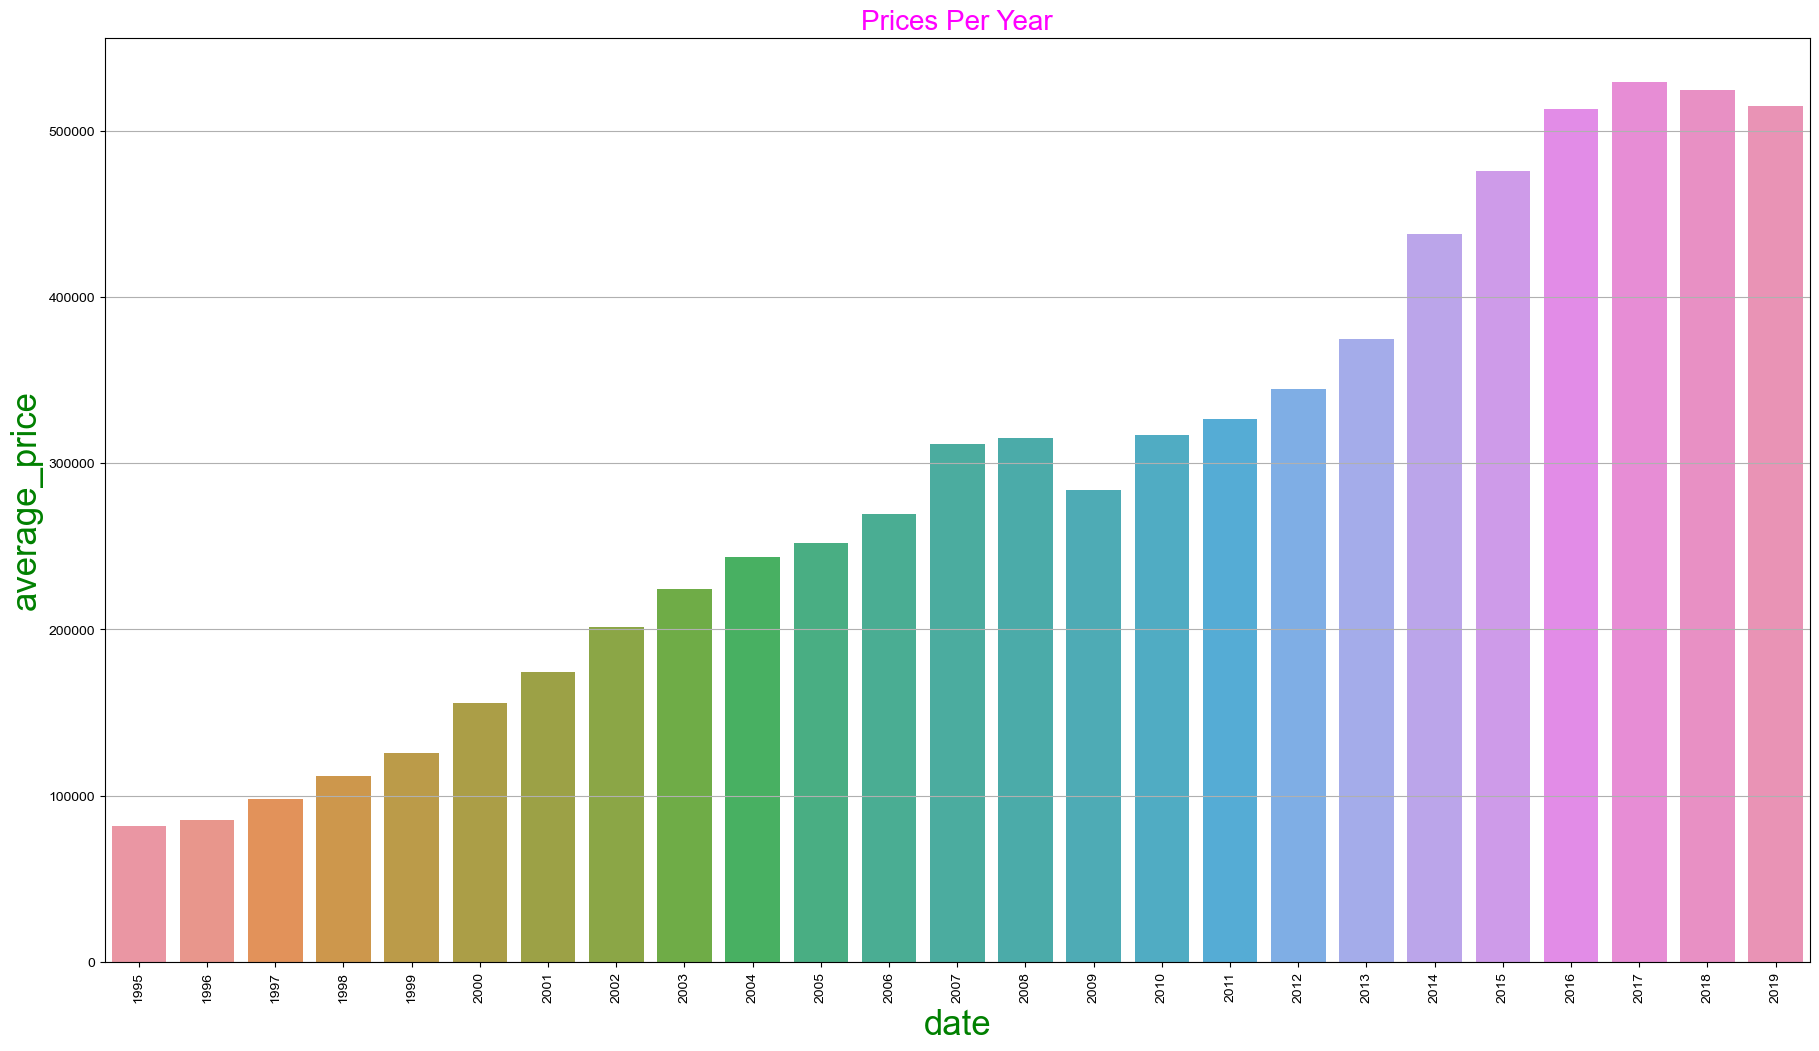

In [32]:
# Displaying Average House prices in each year
no_house_sold = df_house.groupby("date")["average_price"].mean().reset_index()

plt.figure(figsize=[22,12])
plt.xticks(rotation=90)
plt.grid()
plt.xlabel("date",fontsize=25,color = "g")
plt.ylabel("average_price",fontsize=25,color="g")
plt.title("Prices Per Year",color="magenta",fontsize=20)
sns.barplot("date","average_price",data = no_house_sold)
sns.set_context("talk")
sns.set_style("dark")
plt.show()


The above graphs shows us the Average price of house in each year. We will get a clear view on the house price rise in each year.We can get an idea about which was the years where the price got a huge rise and a dip. Graphs shows that 2007 and 2014 was a good year for real estate industry where a huge rise in house price happened and  2009 considered as the a bad year where we can see a dip which resulted due to the world economic crisis. **Generally house price increases gradually with respect to years.**

In [33]:
# Price changes in boroughs over time 
# Creating the Figure instance
# Default display for top 5 most expensive boroughs 
boroughs_to_hide = np.delete(boroughs, [0,6,13,20,32])
fig = px.line(df_boroughs, x='date', y= 'average_price' , template = 'simple_white', title ='The change of house prices over 25 years (London boroughs)',
              width=1000, height=600 , color = 'area')
fig.for_each_trace(lambda trace: trace.update(visible="legendonly") 
                   if trace.name in boroughs_to_hide else ())
fig.show()

The above graph is giving us an idea about the change of the prices of houses for the last 25 years with respect to each boroughs. We can get the price changes in each boroughs displayed in various colours from the year 1995 to 2020. It is similar to the graph we drafted above, but the difference is it gives more deeper data. If we look closer it is clear that each boroughs follows a similar pattern. variation might be smaller, but prices increases with respect to year in most of the cases.

In [34]:
#encoding categorical variables into numeric labels through labelencoding
from sklearn.preprocessing import LabelEncoder
area = LabelEncoder()
df_house['area_n'] = area.fit_transform(df_house['area'])

In [35]:
#dropping the area columns
df_house=df_house.drop('area',axis=1)

In [36]:
df_house

date  average_price  code  houses_sold  no_of_crimes  borough_flag  \
0      1995          91449     1         17.0   2156.729627             1   
1      1995          82203     1          7.0   2156.729627             1   
2      1995          79121     1         14.0   2156.729627             1   
3      1995          77101     1          7.0   2156.729627             1   
4      1995          84409     1         10.0   2156.729627             1   
...     ...            ...   ...          ...           ...           ...   
13542  2019         248562     1      70681.0   2156.729627             0   
13543  2019         249432     1      75079.0   2156.729627             0   
13544  2019         249942     1      64605.0   2156.729627             0   
13545  2019         249376     1      68677.0   2156.729627             0   
13546  2019         248515     1      67814.0   2156.729627             0   

       sq_houses_sold  area_n  
0        2.890000e+02       6  
1        4.900000e+01       6  
2        1.960000e+02       6  
3        4.900000e+01       6  
4        1.000000e+02       6  
...               ...     ...  
13542    4.995804e+09      10  
13543    5.636856e+09      10  
13544    4.173806e+09      10  
13545    4.716530e+09      10  
13546    4.598739e+09      10  

[10166 rows x 8 columns]

In [37]:
df_house.info() #dataset info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10166 entries, 0 to 13546
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            10166 non-null  int64  
 1   average_price   10166 non-null  int64  
 2   code            10166 non-null  int32  
 3   houses_sold     10166 non-null  float64
 4   no_of_crimes    10166 non-null  float64
 5   borough_flag    10166 non-null  int64  
 6   sq_houses_sold  10166 non-null  float64
 7   area_n          10166 non-null  int32  
dtypes: float64(3), int32(2), int64(3)
memory usage: 635.4 KB


In the above few lines , We used **LabelEncoder class to transform the categorical variable 'area' into numeric labels and stores the encoded labels in a new column 'area_n' in the DataFrame df**. LabelEncoder should be used when the categorical data has a clear ordinal relationship or when the algorithm you're using requires numerical input. After that we removed the categorical variable 'area' from the df. This process allows machine learning models to work with categorical data that requires numerical representation.

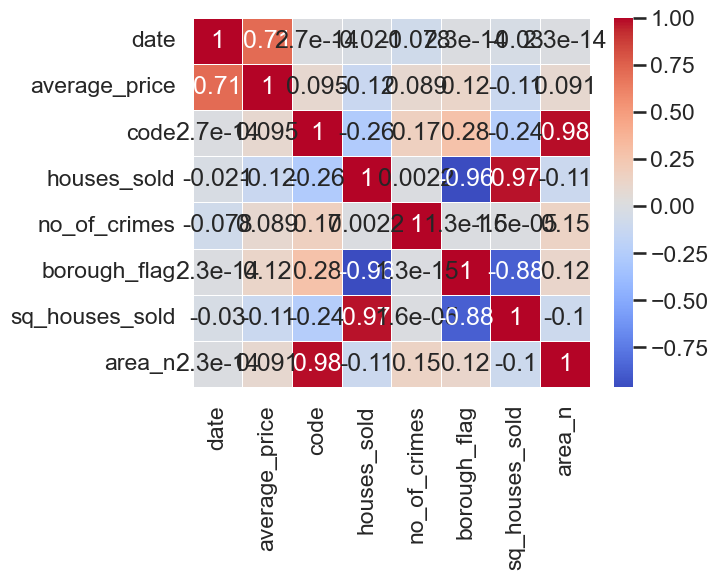

In [38]:
#corelation matrix
sns.heatmap(df_house.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

The above line of code is used to create and display a correlation matrix heatmap using the corr function from the DataFrame df and the heatmap function from the seaborn library.This visualization helps to identify patterns and relationships between variables, where darker colors represent stronger correlations. The numerical annotations provide specific correlation values for each variable pair.

In [39]:
#importing the modules for splitting the dataset
from sklearn.model_selection import train_test_split

In [40]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X=df_house.drop('average_price',axis=1)
y=df_house['average_price']
X.head()

date  code  houses_sold  no_of_crimes  borough_flag  sq_houses_sold  area_n
0  1995     1         17.0   2156.729627             1           289.0       6
1  1995     1          7.0   2156.729627             1            49.0       6
2  1995     1         14.0   2156.729627             1           196.0       6
3  1995     1          7.0   2156.729627             1            49.0       6
4  1995     1         10.0   2156.729627             1           100.0       6

In [41]:
y.head()

0    91449
1    82203
2    79121
3    77101
4    84409
Name: average_price, dtype: int64

In the above steps, we are imported the libraries for dataset splitting and splits the dataset into input features (X) and the target variable (y) by removing the 'average_price' column from df and assigning it to X, while assigning the 'average_price' column itself to y.

In [42]:
#splitting the dataset into train test- Temporal split
X_train = X[X['date'] <= 2015]
X_test = X[X['date'] >= 2016]

y_train = y[X['date'] <= 2015]
y_test = y[X['date'] >= 2016]

In [43]:
X_train

date  code  houses_sold  no_of_crimes  borough_flag  sq_houses_sold  \
0      1995     1         17.0   2156.729627             1    2.890000e+02   
1      1995     1          7.0   2156.729627             1    4.900000e+01   
2      1995     1         14.0   2156.729627             1    1.960000e+02   
3      1995     1          7.0   2156.729627             1    4.900000e+01   
4      1995     1         10.0   2156.729627             1    1.000000e+02   
...     ...   ...          ...           ...           ...             ...   
13495  2015     1      81957.0   2156.729627             0    6.716950e+09   
13496  2015     1      80192.0   2156.729627             0    6.430757e+09   
13497  2015     1      88132.0   2156.729627             0    7.767249e+09   
13498  2015     1      78861.0   2156.729627             0    6.219057e+09   
13499  2015     1      80366.0   2156.729627             0    6.458694e+09   

       area_n  
0           6  
1           6  
2           6  
3           6  
4           6  
...       ...  
13495      10  
13496      10  
13497      10  
13498      10  
13499      10  

[8568 rows x 7 columns]

In [44]:
X_test

date  code  houses_sold  no_of_crimes  borough_flag  sq_houses_sold  \
252    2016     1         15.0   2156.729627             1    2.250000e+02   
253    2016     1         36.0   2156.729627             1    1.296000e+03   
254    2016     1         35.0   2156.729627             1    1.225000e+03   
255    2016     1          7.0   2156.729627             1    4.900000e+01   
256    2016     1          9.0   2156.729627             1    8.100000e+01   
...     ...   ...          ...           ...           ...             ...   
13542  2019     1      70681.0   2156.729627             0    4.995804e+09   
13543  2019     1      75079.0   2156.729627             0    5.636856e+09   
13544  2019     1      64605.0   2156.729627             0    4.173806e+09   
13545  2019     1      68677.0   2156.729627             0    4.716530e+09   
13546  2019     1      67814.0   2156.729627             0    4.598739e+09   

       area_n  
252         6  
253         6  
254         6  
255         6  
256         6  
...       ...  
13542      10  
13543      10  
13544      10  
13545      10  
13546      10  

[1598 rows x 7 columns]

In [45]:
y_train

0         91449
1         82203
2         79121
3         77101
4         84409
          ...  
13495    215756
13496    216350
13497    216676
13498    218500
13499    219582
Name: average_price, Length: 8568, dtype: int64

In the above 3 line of code, we divided/splitted the dataset into 2 set based on our requirment , ie based on the year. We took the data till 2015 as training data and the remaining data till 2020 as testing data. From the above graph you can see the X_train,X_test,y_train, y_test. As we are doing the house price prediction, it find relevant to get the model trained based on the year as it is a time series data and will help the model to predict accurately.

# **Training the model**

**Linear Regression Model**

In [46]:
#importing the LinearRegression model
from sklearn.linear_model import LinearRegression

In [47]:
# training the LinearRegression model
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)


LinearRegression()

Linear Regression is a fundamental supervised machine learning algorithm used for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the input features and the target variable. The main goal of linear regression is to find the best-fitting linear equation that describes the relationship between the variables.

In [48]:
#making predictions on the test set with Linear regression
pred=lr_clf.predict(X_test)

The first model we are selecting here is LinearRegression. We imported the module and trained the model with the trained dataset. the code creates an instance of the Linear Regression model and trains it using the fit method with the training data (X_train) and corresponding target variable (y_train). This process allows the model to learn the relationships between the input features and the target variable, enabling it to make predictions based on new input data. In the last code we make predictions on the test set using the trained Linear Regression model (lr_clf) and defined to pred. Later We are going to do the above steps with respect to different machine learning techniques like Decision tree regressor, Random forest regressor, lasso regressor, KNeighborsRegressor and MLP model. 

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Regression Metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

In [50]:
#Calculating and printing R-squared (coefficient of determination) for both the training set and the test set
print('R squared training set score : ', round(lr_clf.score(X_train, y_train)*100, 2))
print('R squared test set score: ', round(lr_clf.score(X_test, y_test)*100, 2))

R squared training set score :  51.72
R squared test set score:  9.85


128878.93532660148

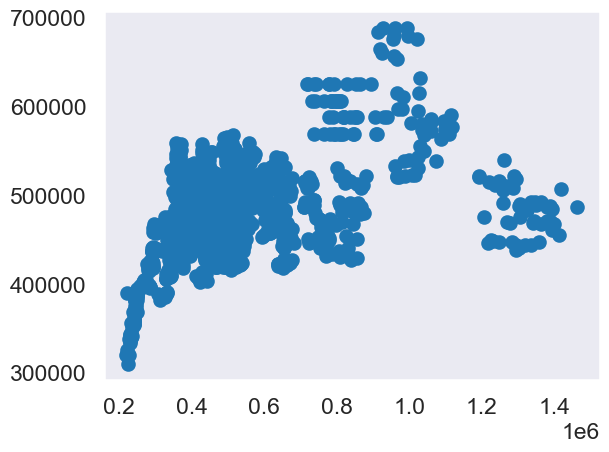

In [51]:
#Visualizing the predicted value against the actual value
plt.scatter(y_test,pred)
mean_absolute_error(y_test,pred)

In the above codes, we defines the errors like Mean abosulte error, Mean square error, root mean square error and r2_score and after that we are calculating and printing R-squared (coefficient of determination) for both the training set and the test set. Leter we are using a scatter plot to represent the the predicted value against the actual value. We are going to do the above steps with respect to different machine learning techniques like Decision tree regressor, Random forest regressor, lasso regressor, KNeighborsRegressor and MLP model. 

**Decision Tree Regression Model**

In [52]:
#importing the DecisionTreeRegressor model and training the model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


DecisionTreeRegressor()

Decision Tree Regression is a type of regression algorithm that uses a decision tree to model the relationship between independent variables (features) and a continuous target variable. Decision trees are versatile and can be applied to both classification and regression tasks, but in this case, we'll focus on their usage for regression.

In [53]:
#Calculating and printing R-squared (coefficient of determination) for both the training set and the test set
print('R squared training set score: ', round(dtr.score(X_train, y_train)*100, 2))
print('R squared test set score: ', round(dtr.score(X_test, y_test)*100, 2))

R squared training set score:  99.98
R squared test set score:  70.37


In [54]:
#making predictions on the test set with decison tree regression
pred_dtr=dtr.predict(X_test)

82000.5516270338

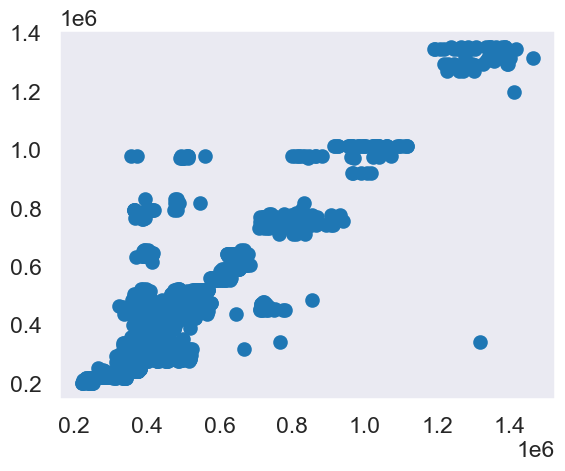

In [55]:
#Visualizing the predicted value against the actual value
plt.scatter(y_test,pred_dtr)
mean_absolute_error(y_test,pred_dtr)

**Lasso Regression Model**

In [56]:
#importing the Lasso model and training the model
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that adds a penalty term to the linear regression objective function. This penalty term is based on the absolute values of the coefficients of the regression variables. The main purpose of Lasso Regression is to perform feature selection and prevent overfitting by pushing some coefficients to be exactly zero, effectively eliminating certain features from the model.

In [57]:
#Calculating and printing R-squared (coefficient of determination) for both the training set and the test set
print('R squared training set score', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set score', round(reg.score(X_test, y_test)*100, 2))

R squared training set score 51.72
R squared test set score 9.88


In [58]:
#making predictions on the test set with lasso regression
pred_reg=reg.predict(X_test)

128834.11987275055

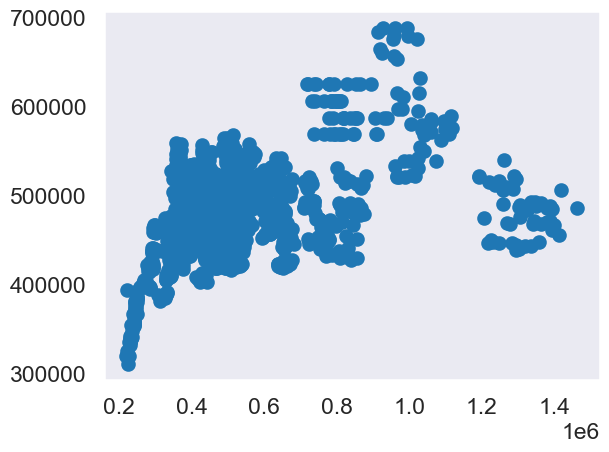

In [59]:
#Visualizing the predicted value against the actual value
plt.scatter(y_test,pred_reg)
mean_absolute_error(y_test,pred_reg)

**Random Forest Regression Model**

In [60]:
#importing the RandomForestRegressor model and training the model
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor object
rfr = RandomForestRegressor()
# Fit the model to the training data
rfr.fit(X_train, y_train)

RandomForestRegressor()

Random Forest Regression is a popular machine learning algorithm that combines the power of decision trees and ensemble learning to perform regression tasks. It's an extension of the Random Forest algorithm, which is originally designed for classification tasks. In Random Forest Regression, instead of predicting classes, the algorithm predicts continuous numeric values.

In [61]:
#Calculating and printing R-squared (coefficient of determination) for both the training set and the test set
print('R squared training set score', round(rfr.score(X_train, y_train)*100, 2))
print('R squared test set score', round(rfr.score(X_test, y_test)*100, 2))

R squared training set score 99.74
R squared test set score 87.9


In [62]:
#making predictions on the test set with random forest regression
pred_rfr=rfr.predict(X_test)

58053.414228604204

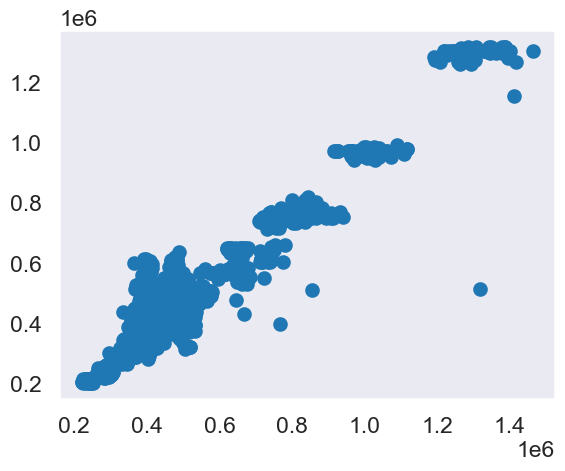

In [63]:
#Visualizing the predicted value against the actual value
plt.scatter(y_test,pred_rfr)
mean_absolute_error(y_test,pred_rfr)

**KNeighbors Regression Model**

In [64]:
#importing the KNeighborsRegressor model and training the model
from sklearn.neighbors import KNeighborsRegressor
# Create a KNN Regressor object
knn = KNeighborsRegressor()
# Fit the model to the training data
knn.fit(X_train, y_train)
# Predict using the trained model


KNeighborsRegressor()

K-Nearest Neighbors (KNN) Regression is a machine learning algorithm used for regression tasks. It's an instance-based, non-parametric algorithm that predicts the target value of a data point by looking at the average (or weighted average) of the target values of its k nearest neighbors in the feature space.

In [65]:
#Calculating and printing R-squared (coefficient of determination) for both the training set and the test set
print('R squared training set score', round(knn.score(X_train, y_train)*100, 2))
print('R squared test set score', round(knn.score(X_test, y_test)*100, 2))

R squared training set score 47.47
R squared test set score -131.76


In [66]:
#making predictions on the test set with KNeighbors Regression
pred_knn=knn.predict(X_test)

253170.2692115144

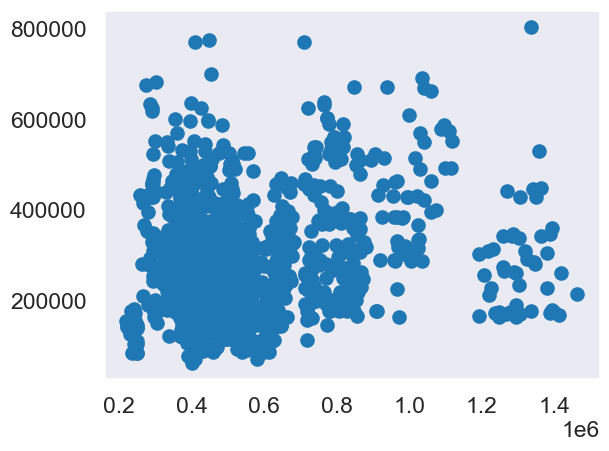

In [67]:
#Visualizing the predicted value against the actual value
plt.scatter(y_test,pred_knn)
mean_absolute_error(y_test,pred_knn)

**MLP Regression Model**

In [68]:
#importing the MLPRegressor model and training the model
from sklearn.neural_network import MLPRegressor
# Create an MLP Regressor object
mlp = MLPRegressor()
# Fit the model to the training data
mlp.fit(X_train, y_train)

MLPRegressor()

MLP Regression (Multi-Layer Perceptron Regression) is a type of artificial neural network used for regression tasks. It's a powerful and flexible model that can capture complex relationships in data. MLP Regression is an extension of the feedforward neural network architecture, often referred to as a "multi-layer perceptron."

In [69]:
#Calculating and printing R-squared (coefficient of determination) for both the training set and the test set
print('R squared training set score', round(mlp.score(X_train, y_train)*100, 2))
print('R squared test set score', round(mlp.score(X_test, y_test)*100, 2))

R squared training set score 0.23
R squared test set score -146.1


In [70]:
#making predictions on the test set with MLP Regression
pred_mlp=mlp.predict(X_test)

268737.03259895975

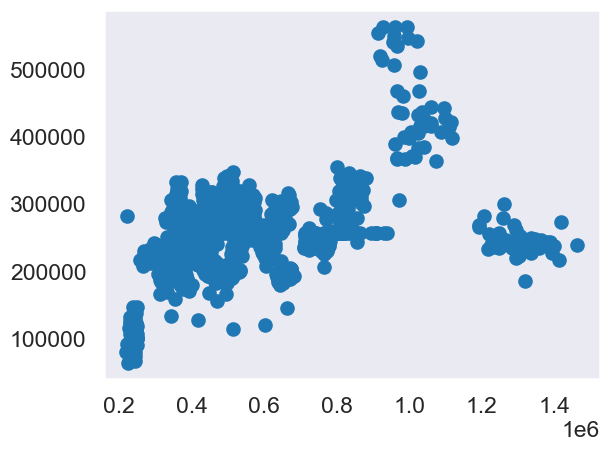

In [71]:
#Visualizing the predicted value against the actual value
plt.scatter(y_test,pred_mlp)
mean_absolute_error(y_test,pred_mlp)

In [72]:
# Importing the SVM model
from sklearn.svm import SVR

# Create a Support Vector Regressor (SVR) object
svr = SVR()

# Fit the SVR model to the training data
svr.fit(X_train, y_train)


SVR()

In [73]:
#making predictions on the test set with support vector machine
pred_svr=svr.predict(X_test)

In [74]:
#Calculating and printing R-squared (coefficient of determination) for both the training set and the test set
print('R squared training set score', round(svr.score(X_train, y_train)*100, 2))
print('R squared test set score', round(svr.score(X_test, y_test)*100, 2))

R squared training set score -2.37
R squared test set score -196.73


In [75]:
#finding MSE and MSA of our best accurate mode- Linear Regression
y_pred = lr_clf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("MAE: ", mae)

MSE:  40591534061.87004
RMSE:  20295767030.93502
MAE:  128878.93532660148


In [76]:
#finding MSE and MSA of our best accurate mode- Random Forest model
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("MAE: ", mae)

MSE:  5448153684.678741
RMSE:  2724076842.3393707
MAE:  58053.414228604204


In [77]:
#finding MSE and MSA of our best accurate mode- Decision Tree Regression
y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("MAE: ", mae)

MSE:  13341658303.700094
RMSE:  6670829151.850047
MAE:  82000.5516270338


In [78]:
#finding MSE and MSA of our best accurate mode- Lasso Regression
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("MAE: ", mae)

MSE:  40577617272.636
RMSE:  20288808636.318
MAE:  128834.11987275055


In [79]:
# Importing libraries and performing cross-validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
#evaluating the performance of linear regression model
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.55480017, 0.56405926, 0.59276152, 0.57547697, 0.58284007])

In [80]:
# Performing cross validation and evaluating the performance of a Lasso model
cross_val_score(Lasso(),X,y,cv=cv)

array([0.55481215, 0.56405215, 0.59275005, 0.57546675, 0.58281306])

In [81]:
# Performing cross validation and evaluating the performance of a DecisionTreeRegressor model
cross_val_score(DecisionTreeRegressor(),X,y,cv=cv)

array([0.95894511, 0.96695195, 0.96205366, 0.96704137, 0.95396401])

In [82]:
## Performing cross validation and evaluating the performance of a RandomForestRegressor model
cross_val_score(RandomForestRegressor(),X,y,cv=cv)

array([0.983938  , 0.98132418, 0.98182326, 0.98042133, 0.98507693])

In the above codes we are doing **cross-validation using the ShuffleSplit class and evaluates the performance ofthe model using the cross_val_score function**. This approach helps assess the model's generalization and performance across multiple iterations of training and testing data splits. Then we evaluated the performance of the **Linear Regression model,lasso model,Decision tree regression model and random forest model** which is our best 4 trained models. importing necessary libraries, setting up cross-validation, and evaluating the performance of a Linear Regression model using scikit-learn ensures a standardized and rigorous approach to model evaluation, parameter tuning, and assessing generalization capabilities. It helps in making informed decisions about the model's performance and suitability for the given task.

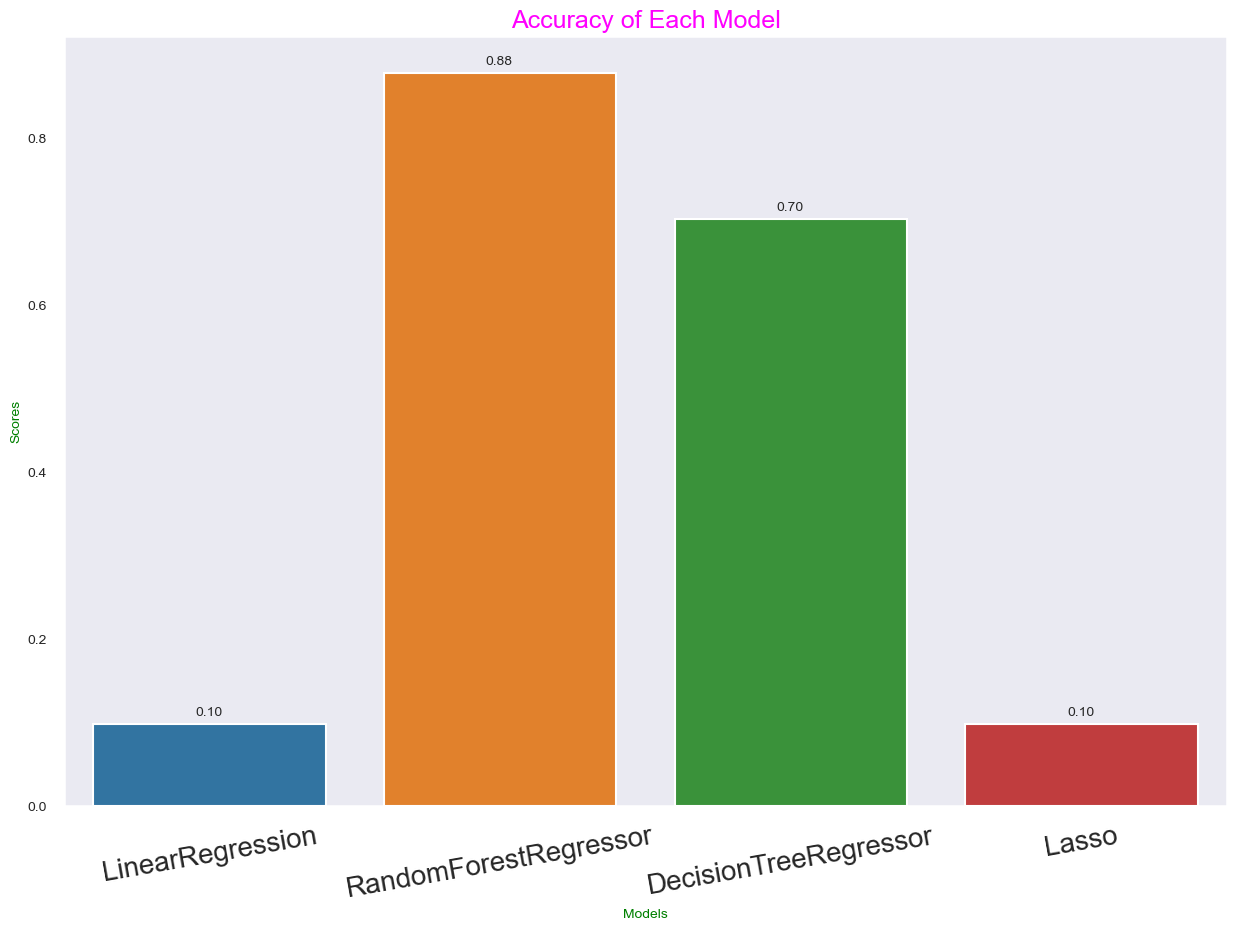

Regression Models   R2 Scores
0       LinearRegression    0.098469
1  RandomForestRegressor    0.878997
2  DecisionTreeRegressor    0.703684
3                  Lasso    0.098778

In [83]:
#finding the accuracy of each model 
s1 = r2_score(y_test,pred)
s2 = r2_score(y_test,pred_rfr)
s3 = r2_score(y_test,pred_dtr)
s4 = r2_score(y_test,pred_reg)

Scores = [s1,s2,s3,s4]
Models = ["LinearRegression","RandomForestRegressor","DecisionTreeRegressor","Lasso"]

plt.figure(figsize=[15,10])
plt.xticks(rotation=10,fontsize=20)
plt.yticks(fontsize=10)
plt.xlabel("Models",color='g',fontsize=10)
plt.ylabel("Scores",color='g',fontsize=10)
plt.title("Accuracy of Each Model",color="magenta")
sns.barplot(Models,Scores)
sns.set_context("talk")
sns.set_style("dark")

for i,v in enumerate(Scores):
    plt.text(i-.05,v+.01,format(Scores[i],'.2f'),fontsize=10)
    
plt.show()

#displaying the score and graphs
data = {"Regression Models" : ["LinearRegression","RandomForestRegressor","DecisionTreeRegressor","Lasso"],
       " R2 Scores" : [s1,s2,s3,s4] }

df1 = pd.DataFrame(data)
df1

In the above figure, there is a representation of the accuracy of the model. Accuracy of the model can be evaluated by checking the R2 score. From the figure itself it is clear that the Random forest model performs better in this case with 0.88 score followed by decision tree with 0.73. The remaining two models performs badly. This chart and the score will help us picking us the right model for our project. 

In [84]:
#finding the best model using grid search
from sklearn.model_selection import GridSearchCV, ShuffleSplit #importing the grid search and shufflesplit libraries

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        "linear_regressor": {
            "model": LinearRegression(),
            "params": {}
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["mse", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        },
        "random_forest": {
            "model": RandomForestRegressor(),
            "params": {
                "n_estimators": [100, 200],
                "max_depth": [None, 5, 10],
                "min_samples_split": [2, 5]
            }
        }
    }

    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        gs.fit(X, y)

        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })

    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])


find_best_model_using_gridsearchcv(X, y)


model  best_score  \
0  linear_regressor    0.573988   
1             lasso    0.573992   
2     decision_tree    0.960343   
3     random_forest    0.982952   

                                         best_params  
0                                                 {}  
1                {'alpha': 2, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}  
3  {'max_depth': None, 'min_samples_split': 5, 'n...

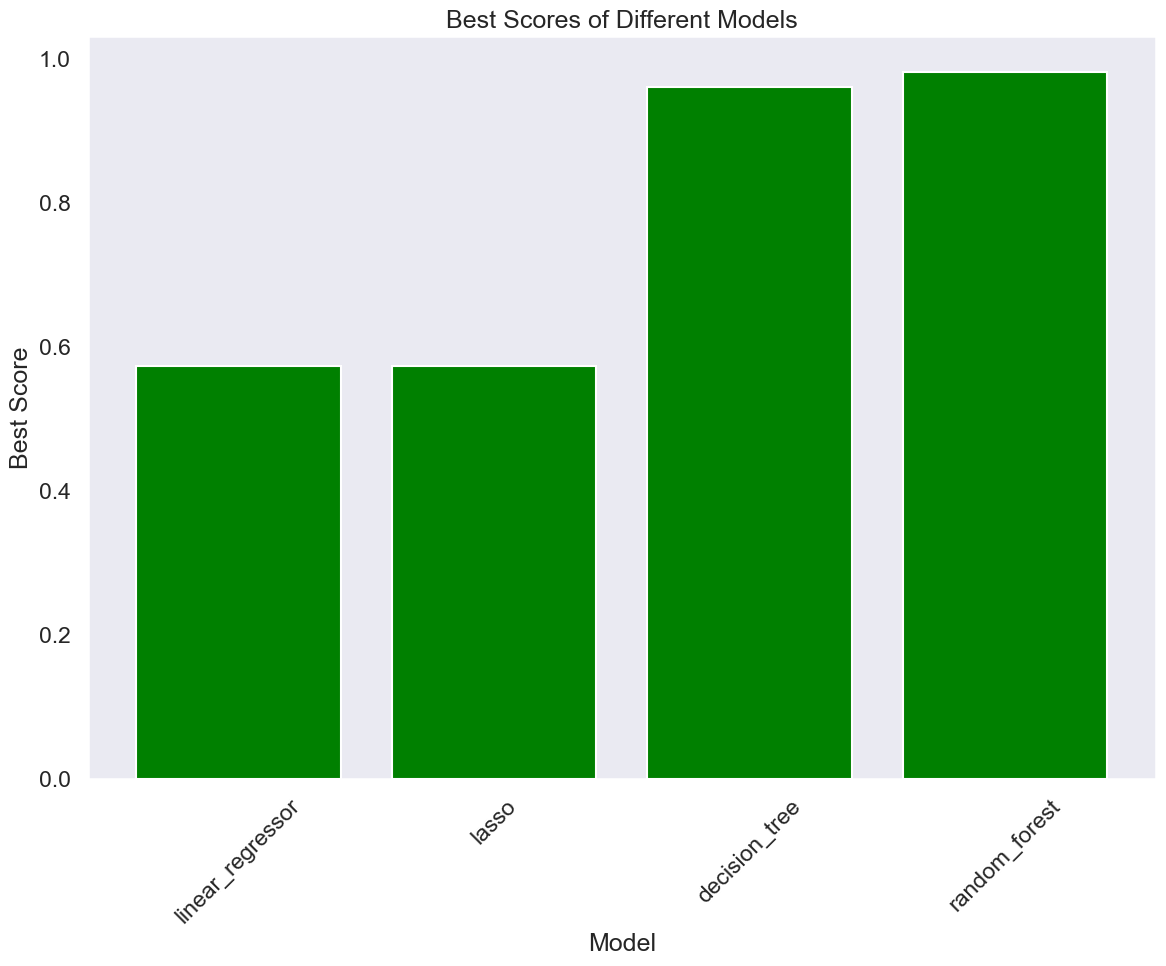

In [85]:
import matplotlib.pyplot as plt

#ploting the gridsearch results in graph

def display_results_as_graph(results_df):
    plt.figure(figsize=(12, 10))
    plt.bar(results_df["model"], results_df["best_score"], color='green')
    plt.xlabel('Model')
    plt.ylabel('Best Score')
    plt.title('Best Scores of Different Models')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

results_df = find_best_model_using_gridsearchcv(X, y)
display_results_as_graph(results_df)


The provided code is used to perform a grid search with cross-validation to find the best model and its corresponding hyperparameters for a given regression task. Grid search is a technique that systematically searches through a predefined set of hyperparameters for each model and evaluates their performance using cross-validation. The main purpose of this code is to help automate the process of model selection and hyperparameter tuning, ultimately identifying the combination that produces the best performance.Overall, this code automates the process of evaluating different regression models and their hyperparameters using cross-validation. It provides insights into which model and hyperparameters are likely to yield the best performance for the given regression task.

In [86]:
#Implementing the best accurate mode- Random Forest model
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("MAE: ", mae)

MSE:  5448153684.678741
RMSE:  2724076842.3393707
MAE:  58053.414228604204


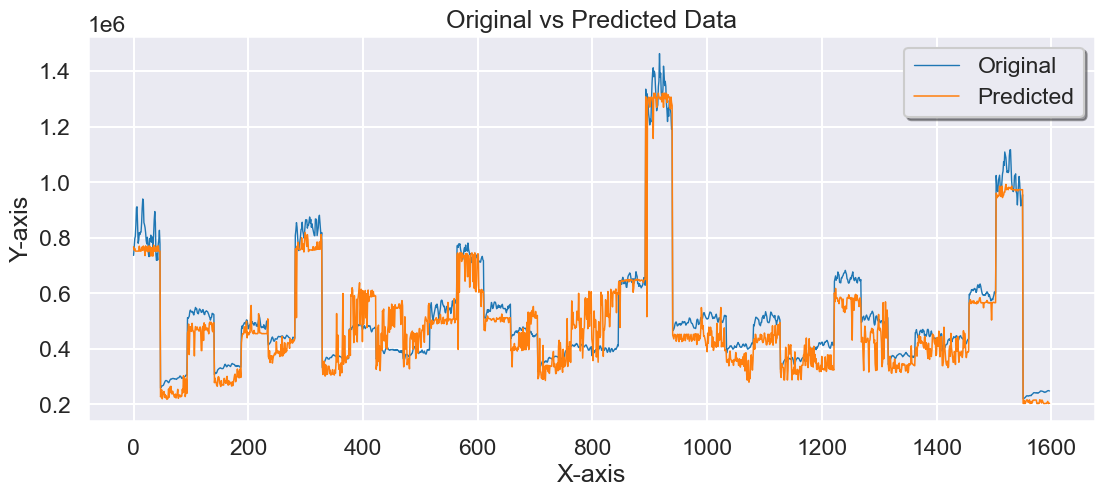

In [87]:
#plotting the actual vs predicted data
x_ax = np.arange(len(y_test))  # Use np.arange for more flexibility
plt.figure(figsize=(13, 5))  # Set figure size
# Plot original and predicted data with labels and linewidth
plt.plot(x_ax, y_test, label="Original", linewidth=1)
plt.plot(x_ax, y_pred, label="Predicted", linewidth=1.1)
plt.title("Original vs Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)  # Add grid lines
plt.show()


In the above line of code snippet which is used to create a plot comparing the actual (ground truth) values of the target variable (y_test) with the predicted values (y_pred) obtained from a regression model. This type of plot helps you visually assess how well the model's predictions align with the actual data. this code generates a plot that compares the actual and predicted values of the target variable, allowing you to visually assess the performance of the regression model. It's useful for quickly identifying areas where the model's predictions deviate from the actual data.

In [88]:
#Displaying the scores of the selected model - Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score

# Regression Metrics
mae = mean_absolute_error(y_test, pred_rfr)
mse = mean_squared_error(y_test, pred_rfr)
rmse = mean_squared_error(y_test, pred_rfr, squared=False)
r2 = r2_score(y_test, pred_rfr)


# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 58053.414228604204
Mean Squared Error (MSE): 5448153684.678741
Root Mean Squared Error (RMSE): 73811.60941666792
R-squared (R2) Score: 0.8789974078488272


This is the line of code to find out the errors and find how accurate our selected model is. We initialised Mean Absolute Error (MAE),Mean Squared Error (MSE),Root Mean Squared Error (RMSE) and R-squared (R2) Score and we calculated from our test and predicted model and above we got the results.

In [89]:
df_house

date  average_price  code  houses_sold  no_of_crimes  borough_flag  \
0      1995          91449     1         17.0   2156.729627             1   
1      1995          82203     1          7.0   2156.729627             1   
2      1995          79121     1         14.0   2156.729627             1   
3      1995          77101     1          7.0   2156.729627             1   
4      1995          84409     1         10.0   2156.729627             1   
...     ...            ...   ...          ...           ...           ...   
13542  2019         248562     1      70681.0   2156.729627             0   
13543  2019         249432     1      75079.0   2156.729627             0   
13544  2019         249942     1      64605.0   2156.729627             0   
13545  2019         249376     1      68677.0   2156.729627             0   
13546  2019         248515     1      67814.0   2156.729627             0   

       sq_houses_sold  area_n  
0        2.890000e+02       6  
1        4.900000e+01       6  
2        1.960000e+02       6  
3        4.900000e+01       6  
4        1.000000e+02       6  
...               ...     ...  
13542    4.995804e+09      10  
13543    5.636856e+09      10  
13544    4.173806e+09      10  
13545    4.716530e+09      10  
13546    4.598739e+09      10  

[10166 rows x 8 columns]

In [90]:
X_train.columns

Index(['date', 'code', 'houses_sold', 'no_of_crimes', 'borough_flag',
       'sq_houses_sold', 'area_n'],
      dtype='object')

Displayed the columns of X for better understanding about the input columns while giving the input for the prediction. 

In [98]:
#predicting the price
from sklearn.ensemble import RandomForestRegressor
import joblib
import pandas as pd


rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Saved the trained model as a .pkl file
joblib.dump(rfr, 'rfr.pkl')

# Load the trained model
loaded_model = joblib.load('rfr.pkl')

# Provide new data for prediction
new_house = pd.DataFrame({'date': [2005], 'code': [14], 'House_sold': [350], 'no_of_crimes': [2500], 'borough_flag': [1], 
                          'sq_houses_sold': [99000], 'area_n': [14]})

# Make predictions using the loaded model
predicted_price = loaded_model.predict(new_house)

# Interpret and use the predictions
print(f"Predicted price for the new house: £{predicted_price}")


Predicted price for the new house: £[247627.44]


The above code snippet demonstrates the process of training a Random Forest Regression model, saving it to a .pkl file using joblib, loading the saved model, and using it to predict the price of a new house based on its features. After importing the nessessary modules our trained model is saved and loaded. Then we provide new data for prediction. The values provided in the dictionary represent the features of the new house, such as 'date', 'code', 'House_sold', 'no_of_crimes', 'borough_flag', 'sq_houses_sold', and 'area_n'. Based on the input we are giving the model is predicting the price which we can see above.

In [92]:

unique_code_values = df_house['code'].unique()
unique_area_n_values = df_house['area_n'].unique()

print("Unique values in 'code' column:", unique_code_values)
print("Unique values in 'area_n' column:", unique_area_n_values)

Unique values in 'code' column: [ 1  2  3  4  5  6  7  8  9 10 30 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33]
Unique values in 'area_n' column: [ 6  0  1  2  3  4  5  7  8  9 30 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 31 32 33 10]


The above code is just to make a comparison between the 2 columns 'code' and 'area_n' we have generated. The code column we modified by extracting the last digit and the area_n has been extracted by applying local encoder to the location , ie, categorical value. 

The above code demonstrates the process of training a Random Forest model, rfr, saving it to a rfr.pkl file, loading the saved model, providing new data for prediction, making predictions using the loaded model, and using the predictions for further analysis or decision-making. After the model is loaded , we provided the new data for prediction . Our newly provided data includes date, area code and borough and the model retured us with a predicted price.


In [94]:
import os

# Get the current working directory
current_directory = os.getcwd()

# Join the current directory with the filename
saved_location = os.path.join(current_directory, 'rfr.pkl')
print("Saved location of rfr.pkl:", saved_location)

saved_location = os.path.join(current_directory, 'location_mapping.pkl')
print("Saved location of location_mapping.pkl:", saved_location)

Saved location of rfr.pkl: C:\Users\jojorosh\rfr.pkl
Saved location of location_mapping.pkl: C:\Users\jojorosh\location_mapping.pkl


This code is just to find out the exact location of the file 'rfr.pkl' and 'location_mapping.pkl' which we might need later.